In [170]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [136]:
#Q1

options1 = pd.read_csv('Optionsq1.csv')
print(options1.dtypes)
# add a column for the underlying price
options1['S'] = 100

# we also need to consider dividends and discount factors for the PCP equation to hold.
# Since there has been no explicit mention of how these rates are to be computed, we adjust the PCP formula:
# PCP: C - P = S*D - K*B where D is the dividend discount factor and B is the discount factor between 0 and maturity T
# We will use the above equation instead of the equation when using continuous compounding: C - P = S*(e-qt) - K*e(-rt) - although both will lead us down the same path if we are to solve for q and r

options1['S*D'] = 0  # Initialize dividend column with zeros
options1['Discount Factor'] = 0

options1

Strike                int64
Time to maturity    float64
Call                float64
Put                 float64
dtype: object


,Strike,Time to maturity,Call,Put,S,S*D,Discount Factor
0,70,0.25,31.187760,0.990001,100,0,0
1,75,0.25,26.603548,1.356038,100,0,0
2,80,0.25,22.129710,1.832449,100,0,0
3,85,0.25,17.798497,2.451485,100,0,0
4,90,0.25,13.656085,3.259322,100,0,0
...,...,...,...,...,...,...,...
99,110,2.00,13.010976,18.474831,100,0,0
100,115,2.00,10.607695,20.687131,100,0,0
101,120,2.00,8.458015,23.153033,100,0,0
102,125,2.00,6.590732,25.901332,100,0,0


In [171]:
# to find the discount factors, first subset group of options by maturity.
# recall that each discount factor will be the same for each maturity (as will the dividend discount factor) as T will be the only variable that changes as option maturity changes

options1_25 = options1[options1['Time to maturity'] == 0.25].copy() # subset for maturities
options1_50 = options1[options1['Time to maturity'] == 0.50].copy()
options1_50.reset_index(drop=True, inplace=True)
options1_75 = options1[options1['Time to maturity'] == 0.75].copy()
options1_75.reset_index(drop=True, inplace=True)
options1_1 = options1[options1['Time to maturity'] == 1].copy()
options1_1.reset_index(drop=True, inplace=True)
options1_125 = options1[options1['Time to maturity'] == 1.25].copy()
options1_125.reset_index(drop=True, inplace=True)
options1_15 = options1[options1['Time to maturity'] == 1.5].copy()
options1_15.reset_index(drop=True, inplace=True)
options1_175 = options1[options1['Time to maturity'] == 1.75].copy()
options1_175.reset_index(drop=True, inplace=True)
options1_2 = options1[options1['Time to maturity'] == 2].copy()
options1_2.reset_index(drop=True, inplace=True)

In [95]:
# for the 0.25 maturity, use difference of equations in the first two rows to calculate B(0,0.25)
# C - P = S*D - K*B(0,0.25)

# 1) C1 - P1 = S*D - K1*B(0,0.25)
# 2) C2 - P2 = S*D - K2*B(0,0.25)

# subtract 2 from 1: (C1- P1) - (C2 - P2) = (S*D - S*D) - (K1*B(0,0.25)-K2*B(0,0.25)). S*D cancels out
# therefore: (C1- P1) - (C2 - P2) = (B(0,0.25))*(K2-K1)
# B(0,0.25) = ((C1 - P1) - (C2 - P2))/(K2-K1)
# for each subset, the last row value is taken from the previous value (since there is no 2nd row after it).
# this is equal to if you take the last row as row 1 and the previous row as row 2 and calculate B(0,0.25)
# iterate across subsets

In [172]:
#Calculating discount factors

def calculate_discount_factors(df):
    discount_factors = []

    # Loop over each row except the last one, get option prices and strike prices for two adjacent strikes
    for i in range(len(df) - 1):
        C1 = df['Call'].iloc[i]
        P1 = df['Put'].iloc[i]
        C2 = df['Call'].iloc[i+1]
        P2 = df['Put'].iloc[i+1]
        K1 = df['Strike'].iloc[i]
        K2 = df['Strike'].iloc[i+1]
        df_val = ((C1 - P1) - (C2 - P2)) / (K2 - K1) # from PCP above
        discount_factors.append(df_val) # Store the calculated discount factor

    df['Discount Factor'] = np.nan
    df.loc[df.index[:-1], 'Discount Factor'] = discount_factors # Assign computed values to all but the last row
    df['Discount Factor'] = df['Discount Factor'].ffill()  # Forward fill the last row with the most recent value
    return df

# Apply the function to multiple option df's with different maturities
options1_25 = calculate_discount_factors(options1_25)
options1_50 = calculate_discount_factors(options1_50)
options1_75 = calculate_discount_factors(options1_75)
options1_1 = calculate_discount_factors(options1_1)
options1_125 = calculate_discount_factors(options1_125)
options1_15 = calculate_discount_factors(options1_15)
options1_175 = calculate_discount_factors(options1_175)
options1_2 = calculate_discount_factors(options1_2)

options1_2

,Strike,Time to maturity,Call,Put,S,S*D,Discount Factor
0,70,2.0,38.279541,6.818741,100,0,0.923116
1,75,2.0,34.699779,7.854561,100,0,0.923116
2,80,2.0,31.216013,8.986377,100,0,0.923116
3,85,2.0,27.837202,10.223147,100,0,0.923116
4,90,2.0,24.574413,11.575940,100,0,0.923116
5,95,2.0,21.441372,13.058481,100,0,0.923116
6,100,2.0,18.455096,14.687787,100,0,0.923116
7,105,2.0,15.636536,16.484809,100,0,0.923116
8,110,2.0,13.010976,18.474831,100,0,0.923116
9,115,2.0,10.607695,20.687131,100,0,0.923116


In [173]:
# Function to find inconsistent discount factor rows beyond a set tolerance

def find_df_inconsistent_rows(df, tolerance=1e-6):
    df = df.copy()
    expected_df = df['Discount Factor'].iloc[0]
    df['DF Inconsistent'] = np.abs(df['Discount Factor'] - expected_df) > tolerance
    return df[df['DF Inconsistent']] # Return only the inconsistent rows

# subset dictionary
subsets = {
    'options1_25': options1_25,
    'options1_50': options1_50,
    'options1_75': options1_75,
    'options1_1': options1_1,
    'options1_125': options1_125,
    'options1_15': options1_15,
    'options1_175': options1_175,
    'options1_2': options1_2,
}

# Store inconsistent rows per subset
df_inconsistencies = {}

# Iterate through each dataset and find inconsistencies
for name, df in subsets.items():
    inconsistent_rows = find_df_inconsistent_rows(df, tolerance=1e-6)
    if not inconsistent_rows.empty:
        df_inconsistencies[name] = inconsistent_rows # store inconsistent rows

# Report the results
if df_inconsistencies:
    print("⚠️ Inconsistent Discount Factor rows found:")
    for name, rows in df_inconsistencies.items():
        print(f"\n{name}:")
        print(rows[['Strike', 'Time to maturity', 'Discount Factor']])
else:
    print("✅ All subsets have consistent Discount Factors within tolerance.")

⚠️ Inconsistent Discount Factor rows found:

options1_75:
   Strike  Time to maturity  Discount Factor
7     105              0.75         0.930446
8     110              0.75         1.010446


In [174]:
# recall all discount factors need to be the same for 1 maturity
# clear violation at the 105 and 110 strike. changing them to be equal to 0.970446

first_df = options1_75['Discount Factor'].iloc[0]

# Set all rows to that value
options1_75['Discount Factor'] = first_df

options1_75

,Strike,Time to maturity,Call,Put,S,S*D,Discount Factor
0,70,0.75,33.766353,3.186346,100,0,0.970446
1,75,0.75,29.621214,3.893435,100,0,0.970446
2,80,0.75,25.591225,4.715674,100,0,0.970446
3,85,0.75,21.695552,5.672228,100,0,0.970446
4,90,0.75,17.959592,6.788496,100,0,0.970446
5,95,0.75,14.418201,8.099333,100,0,0.970446
6,100,0.75,11.120649,9.654009,100,0,0.970446
7,105,0.75,8.137284,11.522871,100,0,0.970446
8,110,0.75,5.564298,13.602112,100,0,0.970446
9,115,0.75,3.511802,16.601845,100,0,0.970446


In [175]:
# calculate S*D using PCP formula

def calculate_SD(df):
    df['S*D'] = df['Call'] - df['Put'] + df['Strike'] * df['Discount Factor'] # PCP rearranged to solve for S * D
    return df

options1_25 = calculate_SD(options1_25)
options1_50 = calculate_SD(options1_50)
options1_75 = calculate_SD(options1_75)
options1_1 = calculate_SD(options1_1)
options1_125 = calculate_SD(options1_125)
options1_15 = calculate_SD(options1_15)
options1_175 = calculate_SD(options1_175)
options1_2 = calculate_SD(options1_2)

# the dividend discount factor needs to also be the same at each maturity. check for inconsistency

# Function to find inconsistent S*D values in a DataFrame
def find_sd_inconsistent_rows(df, tolerance=1e-6):
    df = df.copy()
    expected_sd = df['S*D'].iloc[0]  # use the first value as the reference
    df['S*D Inconsistent'] = np.abs(df['S*D'] - expected_sd) > tolerance
    return df[df['S*D Inconsistent']]

subsets = {
    'options1_25': options1_25,
    'options1_50': options1_50,
    'options1_75': options1_75,
    'options1_1': options1_1,
    'options1_125': options1_125,
    'options1_15': options1_15,
    'options1_175': options1_175,
    'options1_2': options1_2,
}

sd_inconsistencies = {}

# Iterate through each dataset and find inconsistencies
for name, df in subsets.items():
    inconsistent_rows = find_sd_inconsistent_rows(df, tolerance=1e-6)
    if not inconsistent_rows.empty:
        sd_inconsistencies[name] = inconsistent_rows

# Report results
if sd_inconsistencies:
    print("⚠️ Inconsistent S*D rows found:")
    for name, rows in sd_inconsistencies.items():
        print(f"\n{name}:")
        print(rows[['Strike', 'Time to maturity', 'S*D']])
else:
    print("✅ All subsets have consistent S*D values within tolerance.")


⚠️ Inconsistent S*D rows found:

options1_75:
   Strike  Time to maturity        S*D
8     110              0.75  98.711194


In [176]:
# See the 110 strike is not aligning at the 0.75y maturity

#obtain first S*D of the 0.75y maturity

first_SD = options1_75['S*D'].iloc[0]

# Set all rows to that value
options1_75['S*D'] = first_SD
options1_75


,Strike,Time to maturity,Call,Put,S,S*D,Discount Factor
0,70,0.75,33.766353,3.186346,100,98.511194,0.970446
1,75,0.75,29.621214,3.893435,100,98.511194,0.970446
2,80,0.75,25.591225,4.715674,100,98.511194,0.970446
3,85,0.75,21.695552,5.672228,100,98.511194,0.970446
4,90,0.75,17.959592,6.788496,100,98.511194,0.970446
5,95,0.75,14.418201,8.099333,100,98.511194,0.970446
6,100,0.75,11.120649,9.654009,100,98.511194,0.970446
7,105,0.75,8.137284,11.522871,100,98.511194,0.970446
8,110,0.75,5.564298,13.602112,100,98.511194,0.970446
9,115,0.75,3.511802,16.601845,100,98.511194,0.970446


In [177]:
# now look for which row PCP does not hold. this will tell which strike may present an arbitrage opportunity to generate a risk free profit

# Function to check if Put-Call Parity (PCP) holds for each row in the DataFrame
def check_put_call_parity(df):
    df['PCP'] = (
        df['Call']
        - df['Put']
        - df['S*D']
        + df['Strike'] * df['Discount Factor']
    )
    df['PCP'] = df['PCP'].round(2)  # Round the 'PCP' column to 2 decimal places
    df['PCP Valid'] = df['PCP'] == 0    # column indicating whether PCP holds (True if no deviation, False if violation)

    return df

# Apply the PCP check function to each options dataset
options1_25 = check_put_call_parity(options1_25)
options1_50 = check_put_call_parity(options1_50)
options1_75 = check_put_call_parity(options1_75)
options1_1 = check_put_call_parity(options1_1)
options1_125 = check_put_call_parity(options1_125)
options1_15 = check_put_call_parity(options1_15)
options1_175 = check_put_call_parity(options1_175)
options1_2 = check_put_call_parity(options1_2)

# Concatenate all datasets into a single DataFrame for analysis
finaldf = pd.concat([options1_25, options1_50, options1_75, options1_1,
                         options1_125, options1_15, options1_175, options1_2],
                        ignore_index=True)

# Extract rows where Put-Call Parity does NOT hold (i.e., potential arbitrage opportunities)
invalid_rows = finaldf[finaldf['PCP Valid'] == False][['Strike', 'Time to maturity', 'PCP', 'PCP Valid']]
print(invalid_rows)

finaldf[25:40]


    Strike  Time to maturity  PCP  PCP Valid
34     110              0.75  0.2      False


,Strike,Time to maturity,Call,Put,S,S*D,Discount Factor,PCP,PCP Valid
25,130,0.50,0.184568,28.605412,100,99.004983,0.980199,0.0,True
26,70,0.75,33.766353,3.186346,100,98.511194,0.970446,0.0,True
27,75,0.75,29.621214,3.893435,100,98.511194,0.970446,0.0,True
28,80,0.75,25.591225,4.715674,100,98.511194,0.970446,0.0,True
29,85,0.75,21.695552,5.672228,100,98.511194,0.970446,0.0,True
30,90,0.75,17.959592,6.788496,100,98.511194,0.970446,0.0,True
31,95,0.75,14.418201,8.099333,100,98.511194,0.970446,0.0,True
32,100,0.75,11.120649,9.654009,100,98.511194,0.970446,0.0,True
33,105,0.75,8.137284,11.522871,100,98.511194,0.970446,0.0,True
34,110,0.75,5.564298,13.602112,100,98.511194,0.970446,0.2,False


In [178]:
# So we have isolated the exact mispriced strike and tenor. Now for the strategy to lock in a riskless profit
# For the 110 strike, the PCP value with the same Dividend Discount Factor and B(0,0.75) as other options of the same 0.75y maturity is 0.2.
# recall PCP: C - P = S*D - K*B(0,t) where t= 0.75 in this instance

LHS = options1_75.loc[options1_75['Strike'] == 110, 'Call'].iloc[0] - options1_75.loc[options1_75['Strike'] == 110, 'Put'].iloc[0]
RHS = options1_75.loc[options1_75['Strike'] == 110, 'S*D'].iloc[0] - 110*options1_75.loc[options1_75['Strike'] == 110, 'Discount Factor'].iloc[0]

difference = LHS - RHS
print(f"Difference in PCP (LHS - RHS): {difference:1f}")

# for PCP to hold, the LHS needs to be lower by 0.2.
# Therefore, the strategy to exploit this strike is to be short the 110 call and long the 110 put

# Cost of strategy at 110 strike:
strat110 = options1_75.loc[options1_75['Strike'] == 110, 'Put'].iloc[0]-options1_75.loc[options1_75['Strike'] == 110, 'Call'].iloc[0]
strat110
# however this is not a risk free strategy because we have sold the 110 strike, and have unlimited downside as the stock price increases past 110


Difference in PCP (LHS - RHS): 0.200000


8.037814729

In [46]:
# So using the 110 strike, we can take offsetting positions in two different box spreads so that we can capture a profit at t = 0 and have a net payoff of 0 at expiry as our payoff only depends on the difference between strike prices (K2 - K1)
# A long box spread works such that you pay an amount at t = 0 to buy a bull spread and bear spread, and are guaranteed to receive the difference in strikes at expiry. 
# A short box spread works that you receive an amount at t = 0 to sell a bull spread and bear spread, and are obligated to pay the difference in strikes at expiry.
# We select a box spread to be long, and a box spread to be short, because using this mispriced strike gives us a self financing strategy that generates positive pay off at t = 0 and non-negative payoff in the future. 
# The payoff at expiry will depend only on the difference between strike prices, if we have one box we are long and one we are short, this total payoff at maturity is guaranteed to be 0 (K2 - K1) - (K2-K1). 
# So we can capture the difference at t = 0 and have guaranteed 0 payoff in the future. 
# We just need to ensure that the difference in strikes between the two box spreads is the same.

In [179]:
# Let's run box spread analysis for our long box spread. We just spoke above that we have the strategy at 110: buy put/ sell call , so this remains constant and is the upper leg of our first strategy (K2)
# If cost < discounted payoff at expiry, this represents an opportunity to go long a box spread. 

# now need to find what K1 is. Set up the data frame

boxdf = options1_75[['Strike', 'Time to maturity', 'Call', 'Put', 'Discount Factor']].copy()
boxdf['Cost of Box'] = 0
boxdf['Payoff at Expiry'] = 0
boxdf['Discounted Payoff'] = 0
boxdf1 = boxdf[boxdf['Strike']<=110].copy() #Create a filtered DataFrame with strikes <= to 110 (our upper strike K2)

boxdf1

# extract reference values from K2
ref_row = boxdf1[boxdf1['Strike'] == 110].iloc[0]
ref_call = ref_row['Call']
ref_put = ref_row['Put']
ref_strike = 110
discount_factor = ref_row['Discount Factor']

# Define function to calculate box spread metrics
def compute_box(row):
    if row['Strike'] >= ref_strike:
        return pd.Series([None, None, None, None])

    strike = row['Strike']
    call = row['Call']
    put = row['Put']
    disc_factor = row['Discount Factor']

    # Total cost to enter the box spread:
    cost = (ref_put - ref_call) - (put - call)
    payoff = ref_strike - strike
    discounted_payoff = payoff * disc_factor
    Profit = discounted_payoff - cost

    return pd.Series([cost, payoff, discounted_payoff, Profit])

# Apply the function to each row
boxdf1[['Cost of Box', 'Payoff at Expiry', 'Discounted Payoff', 'Profit']] = boxdf1.apply(compute_box, axis=1)
boxdf1

,Strike,Time to maturity,Call,Put,Discount Factor,Cost of Box,Payoff at Expiry,Discounted Payoff,Profit
0,70,0.75,33.766353,3.186346,0.970446,38.617821,40.0,38.817821,0.2
1,75,0.75,29.621214,3.893435,0.970446,33.765594,35.0,33.965594,0.2
2,80,0.75,25.591225,4.715674,0.970446,28.913366,30.0,29.113366,0.2
3,85,0.75,21.695552,5.672228,0.970446,24.061138,25.0,24.261138,0.2
4,90,0.75,17.959592,6.788496,0.970446,19.208911,20.0,19.408911,0.2
5,95,0.75,14.418201,8.099333,0.970446,14.356683,15.0,14.556683,0.2
6,100,0.75,11.120649,9.654009,0.970446,9.504455,10.0,9.704455,0.2
7,105,0.75,8.137284,11.522871,0.970446,4.652228,5.0,4.852228,0.2
8,110,0.75,5.564298,13.602112,0.970446,NaN,NaN,NaN,NaN


In [182]:
# So let's take the 100/110 box spread to be long at t = 0 . Cost is 9.50 up front, and pays a discounted amount of 9.7 in the future
# Let's take a short position in another box spread with the same distance of strikes at the same maturity. i.e. let's choose 120 and 130. 

# Find the rows corresponding to the 120 and 130 strikes
row_120 = boxdf[boxdf['Strike'] == 120].iloc[0]
row_130 = boxdf[boxdf['Strike'] == 130].iloc[0]

# Extract the relevant option prices
call_120 = row_120['Call']
call_130 = row_130['Call']
put_120 = row_120['Put']
put_130 = row_130['Put']

# Calculate the value of the strategy
shortboxcost = call_120 - call_130 + put_130 - put_120

print(f"Cost of the short box strategy (120 call - 130 call + 130 put - 120 call): ${shortboxcost:2f}")
longboxcost = boxdf1.loc[6, 'Cost of Box']*-1
print(f"Cost of the long box strategy (100 call - 110 call + 110 put - 100 put): ${longboxcost:,.2f}")
profit = (shortboxcost + longboxcost)
print(f"Profit at t = 0 for going long 100/110 box spread and short 120/130 box spread: ${profit:,.2f}")



Cost of the short box strategy (120 call - 130 call + 130 put - 120 call): $9.704455
Cost of the long box strategy (100 call - 110 call + 110 put - 100 put): $-9.50
Profit at t = 0 for going long 100/110 box spread and short 120/130 box spread: $0.20


Therefore, we can come up with a riskless strategy that profits the exact same amount as the put call parity discrepancy at the 0.75y 110 strike. 

At t = 0 , for the 0.75y maturity, we buy a box spread at the 100/110 strikes (paying 9.50 to receive 10 at expiry), and finance this buy going short a box spread at the same maturity but at 120/130 strikes (receiving 9.70 to pay 10 at expiry). Engaging in this long/short box spread trade, it ensures profit of $0.20 at t = 0 is (> 0) and payoff at expiry is 0. You will realise profit instantly and regardless of where the stock finishes at expiry, you are guaranteed to have a payoff of 0.  

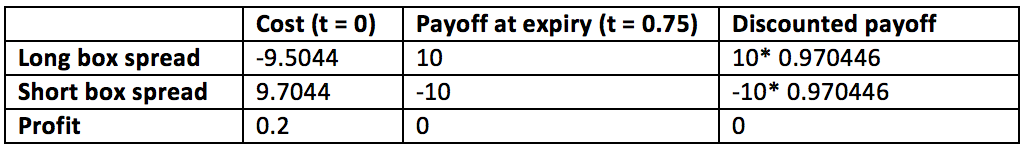




Some scenario analysis is included below, where under any combination of stock price at expiry, you are guaranteed to have the payoff of 10 - 10 = 0: 

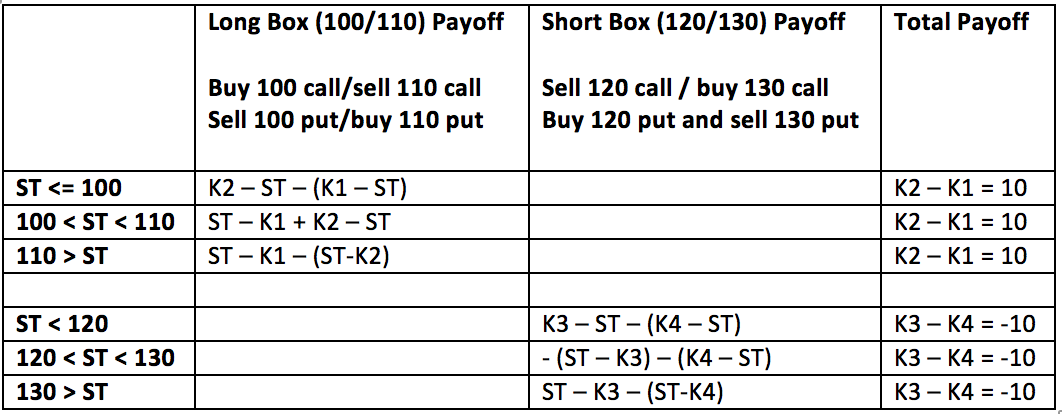

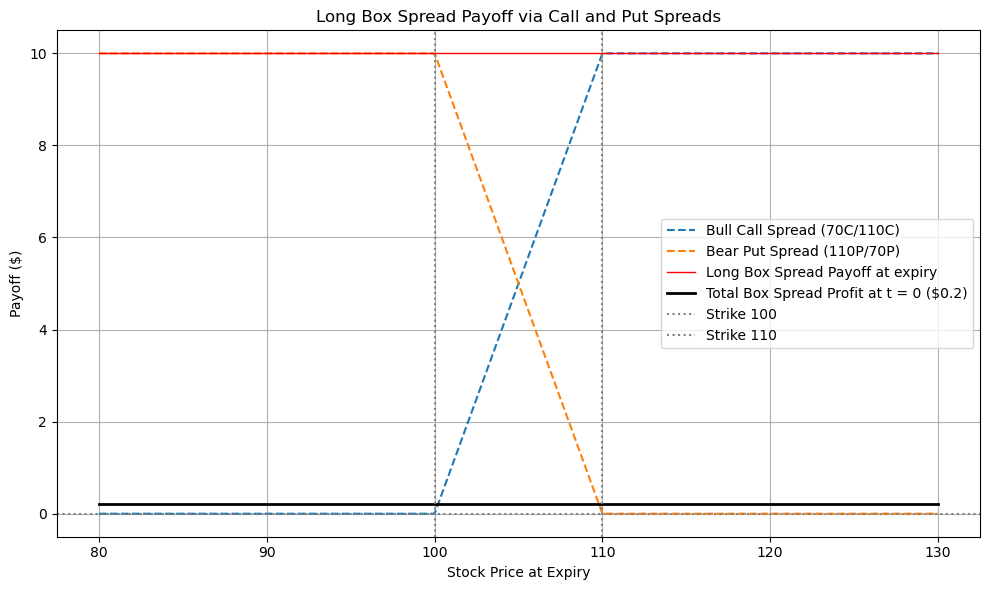

In [152]:
# Plot long box spread to visualise

# Strike prices
K1 = 100
K2 = 110
prem1 = boxdf1.loc[boxdf1['Strike'] == 100, 'Cost of Box'].values[0]  # for K1 = 100

# Range of underlying prices at expiry
S = np.linspace(80, 130, 500)

# Bull call spread: buy 100C, sell 110C
bull_call = np.maximum(0, S - K1) - np.maximum(0, S - K2)

# Bear put spread: buy 110P, sell 100P
bear_put = np.maximum(0, K2 - S) - np.maximum(0, K1 - S)

# Total box spread payoff
total_profit = (bull_call + bear_put)*ref_row['Discount Factor'] - prem1

# Plot
plt.figure(figsize=(10, 6))
plt.plot(S, bull_call, label='Bull Call Spread (70C/110C)', linestyle='--')
plt.plot(S, bear_put, label='Bear Put Spread (110P/70P)', linestyle='--')
plt.plot(S, (bull_call+bear_put), label='Long Box Spread Payoff at expiry', color='red', linewidth=1)
plt.plot(S, total_profit, label='Total Box Spread Profit at t = 0 ($0.2)', color='black', linewidth=2)
plt.axhline(0, color='gray', linestyle=':')
plt.axvline(K1, color='gray', linestyle=':', label=f'Strike {K1}')
plt.axvline(K2, color='gray', linestyle=':', label=f'Strike {K2}')
plt.title('Long Box Spread Payoff via Call and Put Spreads')
plt.xlabel('Stock Price at Expiry')
plt.ylabel('Payoff ($)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

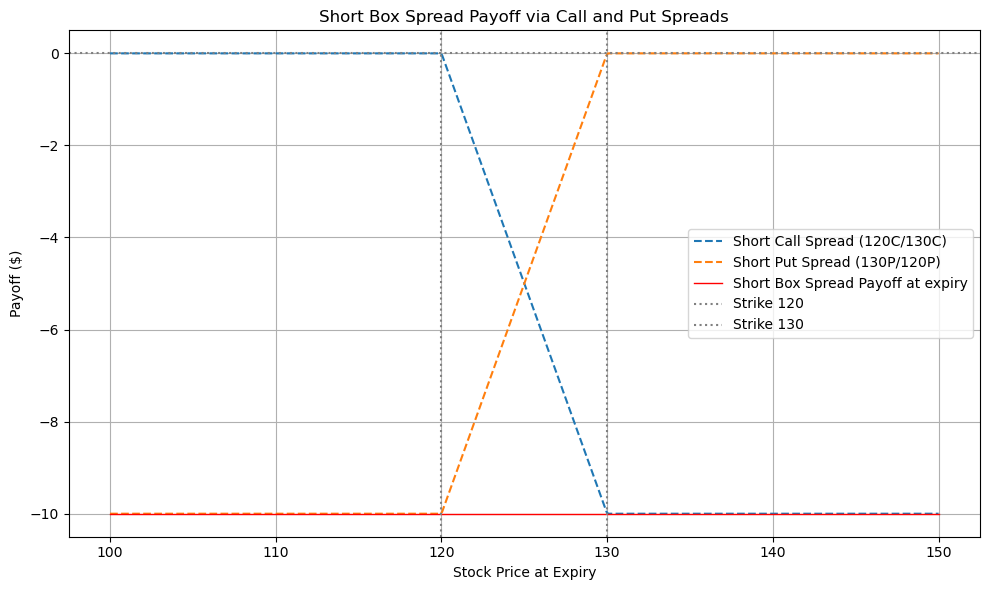

In [190]:
# Plot short box spread to visualise

# Strike prices
K3 = 120
K4 = 130
prem2 = shortboxpayoff

# Range of underlying prices at expiry
S1 = np.linspace(100, 150, 500)

# Bull call spread: sell 120C, buy 130C
bull_call2 = - np.maximum(0, S - K3) + np.maximum(0,S - K4)

# Bear put spread: buy 120P, sell 130P
bear_put2 = np.maximum(0, K3 - S) - np.maximum(0, K4 - S)

# Total box spread payoff
total_profit2 = (bull_call2 + bear_put2)*ref_row['Discount Factor'] + prem2

# Plot
plt.figure(figsize=(10, 6))
plt.plot(S1, bull_call2, label='Short Call Spread (120C/130C)', linestyle='--')
plt.plot(S1, bear_put2, label='Short Put Spread (130P/120P)', linestyle='--')
plt.plot(S1, (bull_call2+bear_put2), label='Short Box Spread Payoff at expiry', color='red', linewidth=1)
plt.axhline(0, color='gray', linestyle=':')
plt.axvline(K3, color='gray', linestyle=':', label=f'Strike {K3}')
plt.axvline(K4, color='gray', linestyle=':', label=f'Strike {K4}')
plt.title('Short Box Spread Payoff via Call and Put Spreads')
plt.xlabel('Stock Price at Expiry')
plt.ylabel('Payoff ($)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

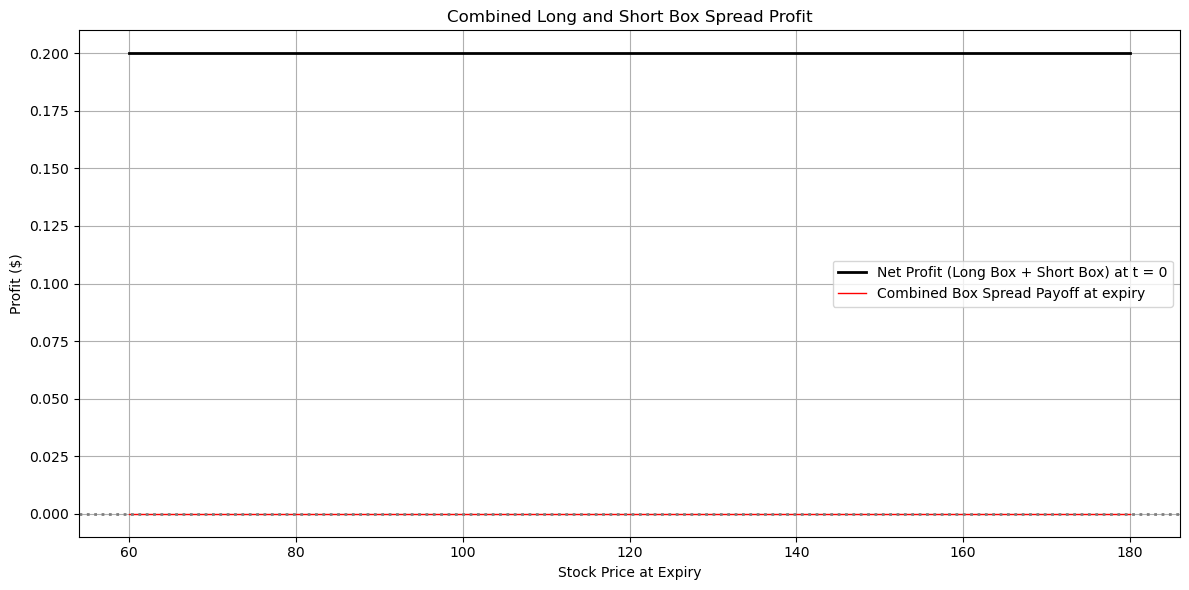

In [193]:
# Plot the combined total profit at t = 0 and payoff at expiry 
S2 = np.linspace(60, 180, 500)
plt.figure(figsize=(12, 6))
plt.plot(S2, total_profit, label='Net Profit (Long Box + Short Box) at t = 0', color='black', linewidth=2)
plt.plot(S2, (bull_call+bear_put)+(bull_call2 + bear_put2), label='Combined Box Spread Payoff at expiry', color='red', linewidth=1)
plt.axhline(0, color='gray', linestyle=':', linewidth=2)
plt.title('Combined Long and Short Box Spread Profit')
plt.xlabel('Stock Price at Expiry')
plt.ylabel('Profit ($)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [194]:
#Q2
options2 = pd.read_csv('options2.csv') #upload data
options2

,Strike,Time to maturity,Call
0,70,0.25,50.783429
1,75,0.25,46.056133
2,80,0.25,41.383537
3,85,0.25,36.776369
4,90,0.25,32.247646
...,...,...,...
115,120,2.00,23.694532
116,125,2.00,20.900004
117,130,2.00,18.249426
118,135,2.00,15.758874


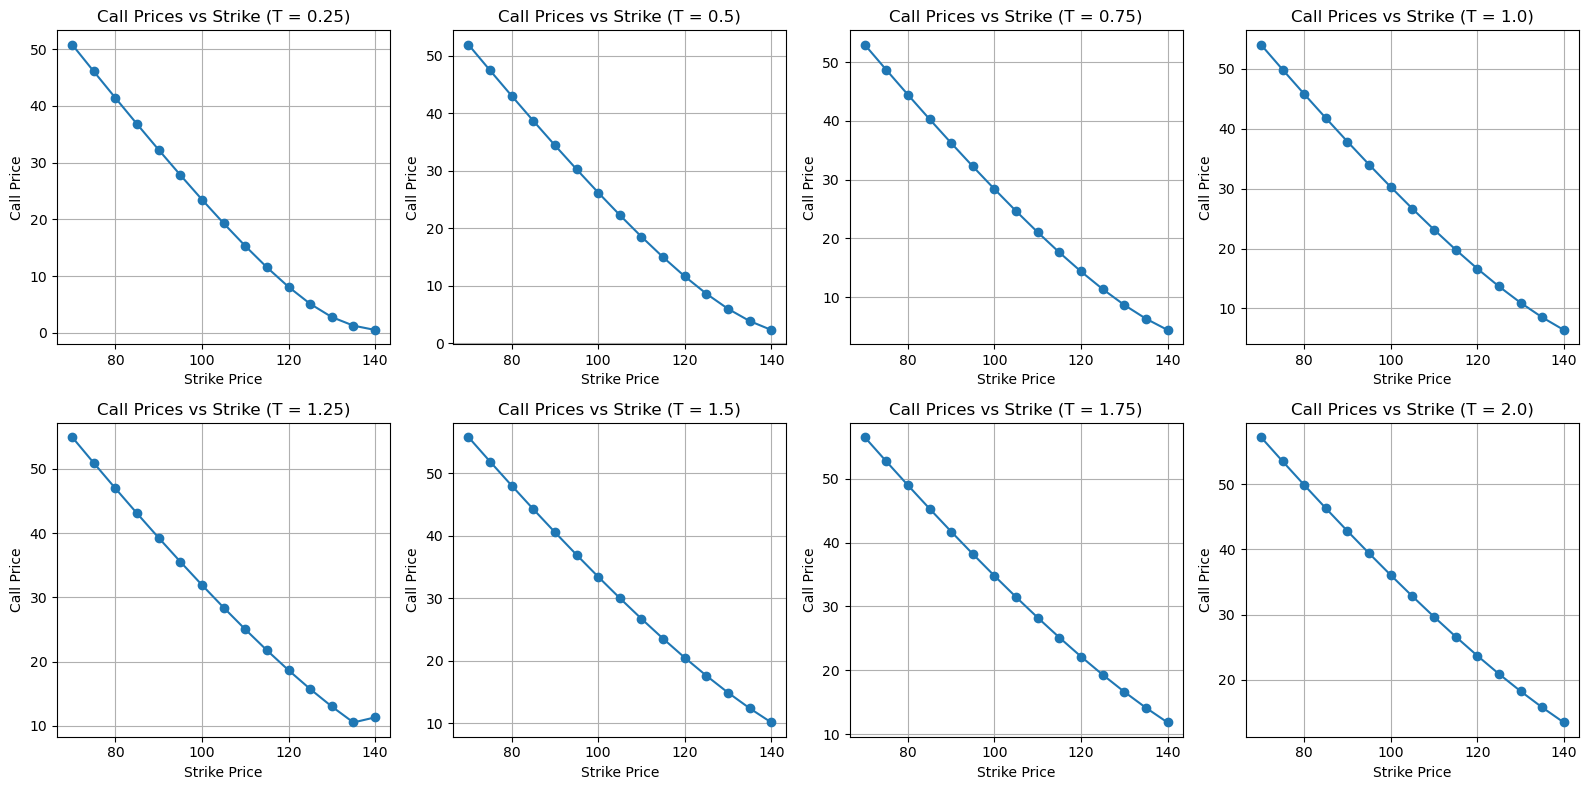

In [195]:
# 2D plots of European call prices vs. strike for each maturity, in a 2 x 4 grid

fig, axes = plt.subplots(2, 4, figsize=(16, 8)) # Adjust figsize as needed
axes = axes.ravel()  # Flatten the axes array for easier iteration

maturity_counter = 0

# Loop through each unique time to maturity in sorted order
for maturity in sorted(options2['Time to maturity'].unique()):
    subset = options2[options2['Time to maturity'] == maturity]

    # Plot call prices vs strike for this maturity
    axes[maturity_counter].plot(subset['Strike'], subset['Call'], marker='o')
    axes[maturity_counter].set_title(f"Call Prices vs Strike (T = {maturity})")
    axes[maturity_counter].set_xlabel("Strike Price")
    axes[maturity_counter].set_ylabel("Call Price")
    axes[maturity_counter].grid(True)
    maturity_counter +=1

plt.tight_layout() # Adjust spacing between subplots
plt.show()


In [196]:
# Let's check whether for all 8 maturities, as the strike price increases, the call option price decreases.
# This property can be termed monotonicity wrt strike.
# If there is a violation, this presents an arbitrage opportunity.

# Loop over each unique maturity in the dataset
for maturity in options2['Time to maturity'].unique():
    sub = options2[options2['Time to maturity'] == maturity].copy()

    # Check if call prices are non-increasing as strike increases
    if all(sub['Call'].iloc[i] >= sub['Call'].iloc[i+1] for i in range(len(sub)-1)):
        print(f"✔️ Monotonicity by strike holds for T = {maturity}")
    else:
        print(f"❌ Monotonicity by strike violated for T = {maturity}")

        # Optionally, show where it fails:
        for i in range(len(sub) - 1):
            if sub['Call'].iloc[i] < sub['Call'].iloc[i + 1]:
                k1 = sub['Strike'].iloc[i]
                k2 = sub['Strike'].iloc[i + 1]
                c1 = sub['Call'].iloc[i]
                c2 = sub['Call'].iloc[i + 1]
                print(f"   At strikes {k1} & {k2}, call price increased: {c1:.2f} → {c2:.2f}")

✔️ Monotonicity by strike holds for T = 0.25
✔️ Monotonicity by strike holds for T = 0.5
✔️ Monotonicity by strike holds for T = 0.75
✔️ Monotonicity by strike holds for T = 1.0
❌ Monotonicity by strike violated for T = 1.25
   At strikes 135 & 140, call price increased: 10.55 → 11.34
✔️ Monotonicity by strike holds for T = 1.5
✔️ Monotonicity by strike holds for T = 1.75
✔️ Monotonicity by strike holds for T = 2.0


In [197]:
# You can lock in a riskless profit by selling the overpriced call (K=140) and buying the underpriced call (K=135).
# This bull spread (call spread) has a non-negative payoff at t = 0 which generates an upfront arbitrage profit of $0.7903 per unit ($11.34-10.55)
price_135 = options2.loc[(options2['Strike'] == 135) & (options2['Time to maturity'] == 1.25),'Call'].values[0]
price_140 = options2.loc[(options2['Strike'] == 140) & (options2['Time to maturity'] == 1.25),'Call'].values[0]
t0cashflow = price_140 - price_135

print(f"Net cash received at t = 0: ${t0cashflow:.2f}")

#SCENARIO ANALYSIS:
# This position has no risk at expiry. i.e. It doesn't matter where the underlying finishes, profit from this strategy will be > 0.
# If ST <= 135, then your bull spread pays off 0.
# If 135 < ST < 140, then your bull spread pays off ST - 135 > 0 
# If ST > 140, then your bull spread pays off 140-135 = 5
# You will have the positive cash flow at time 0 from the spread, so the non-negative payoff at expiry shows that this arbitrage strategy will generate a risk free profit.

print(f"Q2 Arbitrage strategy: Buy 1.25y 135 call, Sell 1.25y 140 call for $0.79 at t = 0")


Net cash received at t = 0: $0.79
Q2 Arbitrage strategy: Buy 1.25y 135 call, Sell 1.25y 140 call for $0.79 at t = 0


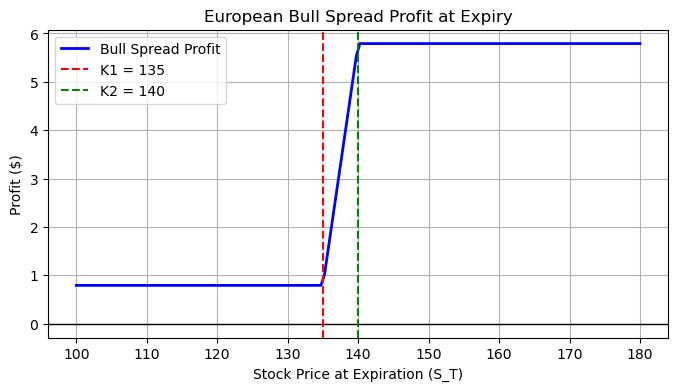

In [206]:
#Profit diagram to visualise

K1 = 135  # Lower strike (long call)
K2 = 140  # Higher strike (short call)
premium_paid = t0cashflow*-1  # Premium we receive for initiating the bull spread strategy

# Stock price range at expiration
S = np.linspace(100, 180, 160)

# Payoff Calculation
profit = np.maximum(S - K1, 0) - np.maximum(S - K2, 0) - premium_paid

# Plotting
plt.figure(figsize=(8,4))
plt.plot(S, profit, label="Bull Spread Profit", color='blue', lw=2)
plt.axhline(0, color='black',linewidth=1)
plt.axvline(K1, color='red', linestyle='--', label=f'K1 = {K1}')
plt.axvline(K2, color='green', linestyle='--', label=f'K2 = {K2}')
plt.title("European Bull Spread Profit at Expiry")
plt.xlabel("Stock Price at Expiration (S_T)")
plt.ylabel("Profit ($)")
plt.legend()
plt.grid(True)
plt.show()

In [199]:
#q3
options3 = pd.read_csv('options3.csv')
options3

,Strike,TTM,Call
0,70,0.25,55.337094
1,75,0.25,50.495530
2,80,0.25,45.688852
3,85,0.25,40.926018
4,90,0.25,36.218113
...,...,...,...
115,120,2.00,23.404063
116,125,2.00,20.346413
117,130,2.00,17.442311
118,135,2.00,14.714251


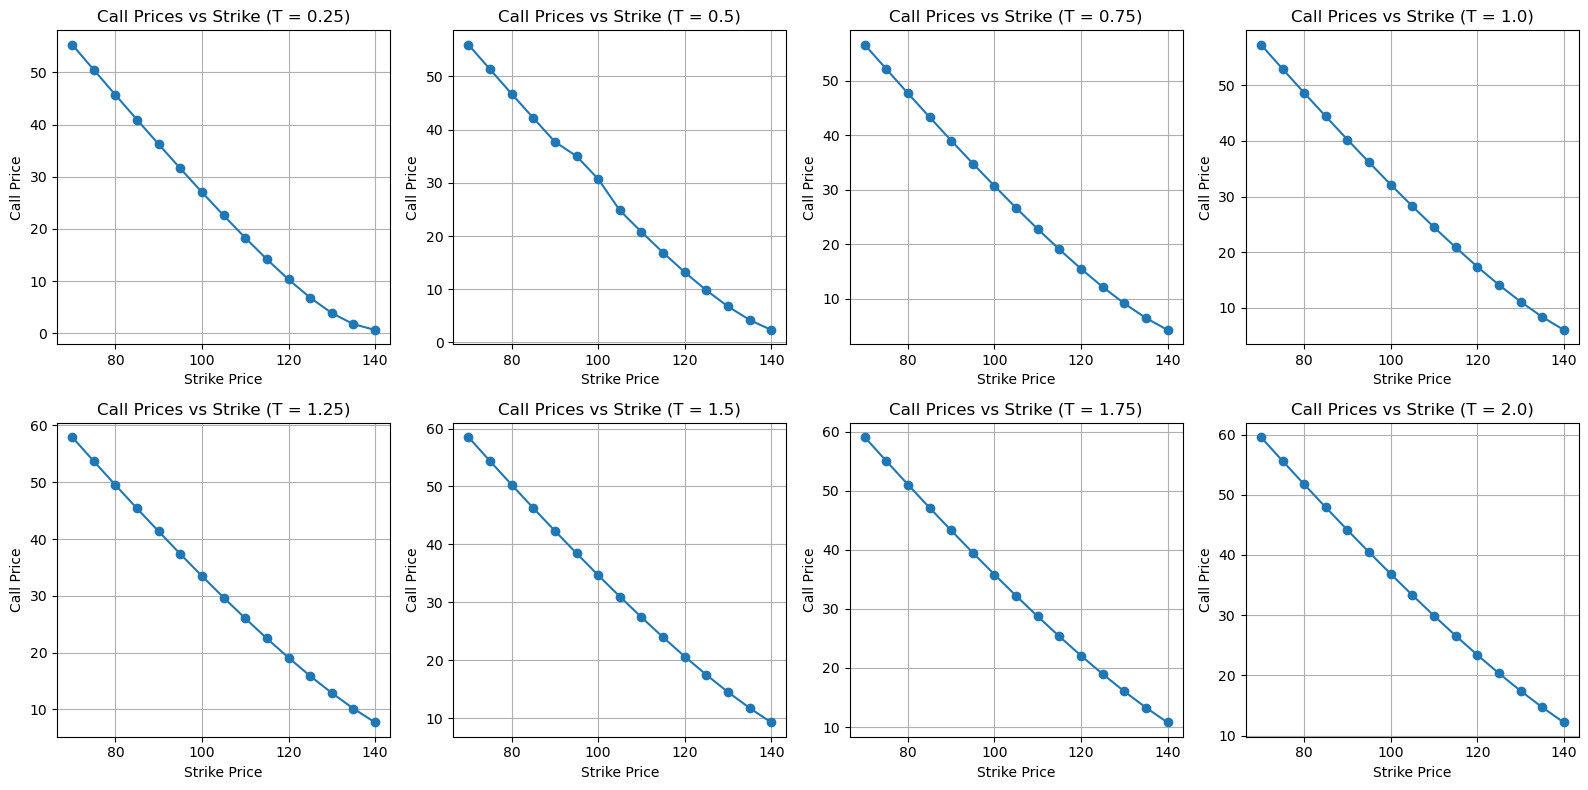

In [200]:
# 2D plots of European call prices vs. strike for each maturity, in a 2 x 4 grid

fig, axes = plt.subplots(2, 4, figsize=(16, 8))
axes = axes.ravel()

maturity_counter = 0

# Loop through each unique time to maturity in sorted order
for maturity in sorted(options3['TTM'].unique()):
    subset = options3[options3['TTM'] == maturity]

    # Plot call prices vs strike for this maturity
    axes[maturity_counter].plot(subset['Strike'], subset['Call'], marker='o')
    axes[maturity_counter].set_title(f"Call Prices vs Strike (T = {maturity})")
    axes[maturity_counter].set_xlabel("Strike Price")
    axes[maturity_counter].set_ylabel("Call Price")
    axes[maturity_counter].grid(True)
    maturity_counter += 1

plt.tight_layout()
plt.show()

In [201]:
# the convexity argument in option prices says that C(K1) - 2*C(K2) + C(K3) => 0
# arbitrage opportunity exists if C(K1) - 2*C(K2) + C(K3) < 0
# this essentially says that you are paid to initiate a call fly position
# you receive money by buying a call at K1, selling 2 calls at K2 and buying another call at K3
# in ordinary, convex conditions you would be expected to pay $ for this condition
# lets check if this exists. if there is a violation, we can initiate an arbitrage strategy to generate risk-free profit

# Group data by 'Time to maturity'
grouped = options3.groupby('TTM')

# Iterate through each maturity group
for maturity, group in grouped:
    # Sort by strike to ensure order
    group = group.sort_values('Strike')
    strikes = group['Strike'].values
    prices = group['Call'].values

    # Check if strikes are equally spaced
    diffs = np.diff(strikes)
    if not all(diffs == diffs[0]):
        print(f"Warning: Strikes not equally spaced for maturity {maturity}")
        continue

    h = diffs[0]  # Strike spacing (e.g., 5)

    # Check convexity condition for each set of three consecutive strikes
    for i in range(1, len(strikes) - 1):
        K1 = strikes[i - 1]
        K2 = strikes[i]
        K3 = strikes[i + 1]
        C1 = prices[i - 1]
        C2 = prices[i]
        C3 = prices[i + 1]

        # Compute convexity
        convexity = C1 - 2 * C2 + C3

        if convexity < 0:
            print(f"Arbitrage opportunity detected at maturity {maturity}:")
            print(f"Strikes: {K1}, {K2}, {K3}")
            print(f"Call prices: C({K1})={C1.round(2)}, C({K2})={C2.round(2)}, C({K3})={C3.round(2)}")
            print(f"Convexity: {convexity.round(2)}")

            # Strategy: Buy long call butterfly spread
            net_cost = convexity.round(2)  # Same as C1 - 2*C2 + C3
            print(f"Net cost of butterfly spread: ${net_cost} (negative means cash inflow)")
            print("Strategy: Buy 1 call at K1, sell 2 calls at K2, buy 1 call at K3")
            print("Payoff is always non-negative, ensuring riskless profit")
            print("-" * 50)


Arbitrage opportunity detected at maturity 0.5:
Strikes: 90, 95, 100
Call prices: C(90)=37.71, C(95)=35.01, C(100)=30.72
Convexity: -1.6
Net cost of butterfly spread: $-1.6 (negative means cash inflow)
Strategy: Buy 1 call at K1, sell 2 calls at K2, buy 1 call at K3
Payoff is always non-negative, ensuring riskless profit
--------------------------------------------------
Arbitrage opportunity detected at maturity 0.5:
Strikes: 95, 100, 105
Call prices: C(95)=35.01, C(100)=30.72, C(105)=24.82
Convexity: -1.6
Net cost of butterfly spread: $-1.6 (negative means cash inflow)
Strategy: Buy 1 call at K1, sell 2 calls at K2, buy 1 call at K3
Payoff is always non-negative, ensuring riskless profit
--------------------------------------------------


In [202]:
# both trades above pay ~$1.60 at inception since C(K1) -2*C(K2) + C(K3) < 0 for each.

# let's see which three strike combination pays higher at t = 0
fly1 = options3.loc[(options3['Strike'] == 90) & (options3['TTM'] == 0.5),'Call'].values[0]-options3.loc[(options3['Strike'] == 95) & (options3['TTM'] == 0.5),'Call'].values[0]*2+options3.loc[(options3['Strike'] == 100) & (options3['TTM'] == 0.5),'Call'].values[0]
fly2 = options3.loc[(options3['Strike'] == 95) & (options3['TTM'] == 0.5),'Call'].values[0]-options3.loc[(options3['Strike'] == 100) & (options3['TTM'] == 0.5),'Call'].values[0]*2+options3.loc[(options3['Strike'] == 105) & (options3['TTM'] == 0.5),'Call'].values[0]

print(f"Fly1 absolute value: {abs(fly1):.15f}")
print(f"Fly2 absolute value: {abs(fly2):.15f}")

abs(fly2) > abs(fly1)

# choose fly2 ie 95, 100, 105 strikes (although it is a very marginal difference between the two flys)
# but either fly will generate a positive risk less profit

Fly1 absolute value: 1.599999999999895
Fly2 absolute value: 1.600000000000104


True

In [203]:
#SCENARIO ANALYSIS: 

# regardless of where the stock is at expiry, you will have riskless profit
# If ST <= 95, your payoff is 0.
# If 95 < ST < 100, your payoff is ST - K1 > 0
# If 100 < ST < 105, your payoff is ST - K1 - 2*(ST - K2) = -ST + 2K2 - K1 = K3 - ST or 105 - ST which is > 0 
# If ST > 105, your payoff is 0. ST - K1 -2 *(ST - K2) + ST - K3 = 0. ST - 95 -2*(ST-100) + ST - 105 = 0.
# You will have the positive cash flow at time 0 from the long call fly, so the non-negative payoff at expiry shows that this arbitrage strategy will generate a risk free profit.

print(f"Q3 Arbitrage strategy: Buy 0.5y 95 call, Sell 2 * 0.5y 100 calls and buy 0.5y 105 call for $1.60 at t = 0")

Q3 Arbitrage strategy: Buy 0.5y 95 call, Sell 2 * 0.5y 100 calls and buy 0.5y 105 call for $1.60 at t = 0


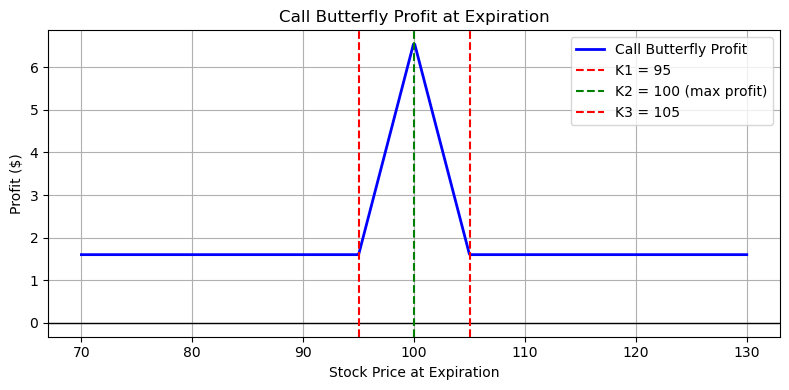

In [205]:
#Profit diagram to visualise

# Define strikes
K1 = 95
K2 = 100
K3 = 105

# Premium paid for the butterfly
premium = -1.6

# Stock prices at expiration
S = np.linspace(70, 130, 500)

# Butterfly profit
profit = (
    np.maximum(S - K1, 0)
    - 2 * np.maximum(S - K2, 0)
    + np.maximum(S - K3, 0) - premium)

# Plotting
plt.figure(figsize=(8, 4))
plt.plot(S, profit, label="Call Butterfly Profit", color='blue', lw=2)
plt.axhline(0, color='black', lw=1)
plt.axvline(K1, color='red', linestyle='--', label=f"K1 = {K1}")
plt.axvline(K2, color='green', linestyle='--', label=f"K2 = {K2} (max profit)")
plt.axvline(K3, color='red', linestyle='--', label=f"K3 = {K3}")
plt.title(f"Call Butterfly Profit at Expiration")
plt.xlabel("Stock Price at Expiration")
plt.ylabel("Profit ($)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [207]:
#q4
options4 = pd.read_csv('options4.csv')
options4['S'] = 150 # underlying is trading at 150 as given in the question
options4

,Strike,Time to maturity,Call,S
0,150,0.25,12.561038,150
1,150,0.50,18.055981,150
2,150,0.75,22.360240,150
3,150,1.00,21.719045,150
4,150,1.25,24.524143,150
5,150,1.50,27.091437,150
6,150,1.75,29.475575,150
7,150,2.00,31.712346,150


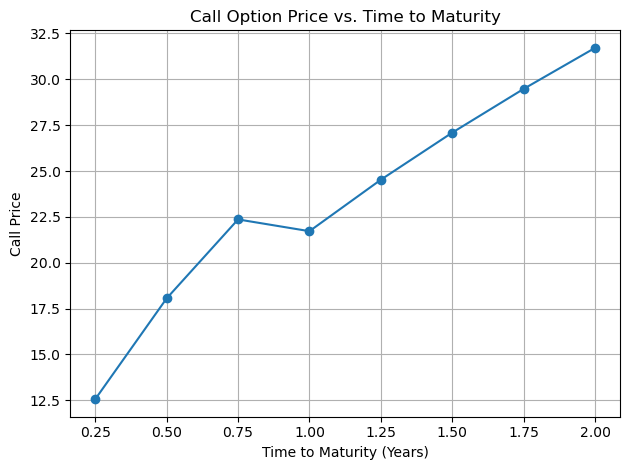

In [208]:
# plot price vs. maturity for all call options

plt.plot(options4['Time to maturity'], options4['Call'], marker='o')

plt.title('Call Option Price vs. Time to Maturity')
plt.xlabel('Time to Maturity (Years)')
plt.ylabel('Call Price')
plt.grid(True)
plt.tight_layout()
plt.show()

In [209]:
# You can see visually that monotonicity of time does not hold at the 1y maturity.
# This presents an arbitrage opportunity to sell the 0.75 call option (expensive) and buy the 1y call option (cheap)
# This is known as a long calendar spread trade.

price_075 = options4.loc[options4['Time to maturity'] == 0.75, 'Call'].values[0]
price_100 = options4.loc[options4['Time to maturity'] == 1.00, 'Call'].values[0]

# Net premium received (since you're selling 0.75y and buying 1.00y)
net_cash_flow = price_075 - price_100

print(f"Net cash received at t = 0: ${net_cash_flow:.2f}")

Net cash received at t = 0: $0.64


Q4: 


To ensure riskless profit, you need to make sure that you receive positive payoff at t = 0 (shown above), and also ensure that in the future the payoff always non-negative.

SCENARIO ANALYSIS (terminology will assume 'we/us' have initiated the long calendar spread):

t = 0: We receive $0.64. At t = 0.75, S can either be less than 150 or greater than 150. 
    For S <= 150, the 0.75y call will not be exercised, so this will payoff 0 for us. 

At T = 1, ST can either be less than 150 or greater than 150. 
    For ST < 150, the 1y call will not be exercised, so this will payoff 0.
    For ST > 150, the 1y call will be exercised, so this will payoff ST - 150, which is > 0. 

No other assets are needed to be traded for this example when St=0.75 < 150. Guaranteed non-negative/+ profit for us if considering the initial cash received. 


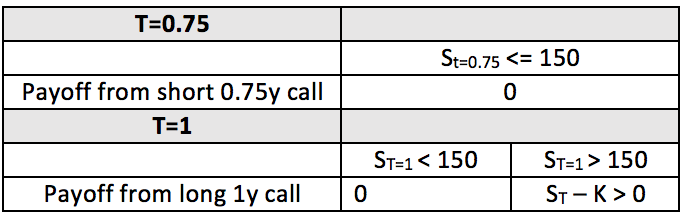



Considering the other case: 

At t = 0.75, if S > 150, the 0.75y call will be exercised against us
This means that the option holder will purchase stock from us at K. Our payoff is -(S-K). 
We need to sell the stock to the option holder (but we don't have the stock). 
So at t = 0.75, we borrow stock from the market for a 0.25y duration (+S) and sell this stock to the option holder. 
For the stock, we receive K from the option holder. This is cash on hand and we decide to lend this out to the market for 0.25y (-K) as r > 0.

Net payoff from the above: -(S-150) + S - 150 = 0 

At T = 1, ST can either be < 150 or > 150 

For ST < 150, the 1y call will not be exercised, so this will payoff 0 for us. 
We need to close out the borrowed position and return the stock to the investor who we initially borrowed off (-ST). 
We will receive from lending out to market. 
If we consider interest, the interest earned on the borrowed stock we obtained will be equal to that earned on K (if r remains constant), so payoff re. interest is 0.
Our final payoff is 0 - ST + K = 150 - ST > 0 as ST < 150

For ST > 150, we will exercise the 1y call, so this will payoff ST - K. 
We need to close out the borrowed position and return the stock to the investor who we initially borrowed off (-ST). 
We will receive K from lending out to market.
If we consider interest, the interest earned on the borrowed stock we obtained will be equal to that earned on K (if r remains constant), so payoff re. interest is 0.
Our final payoff is: ST - K - ST + K = 0 


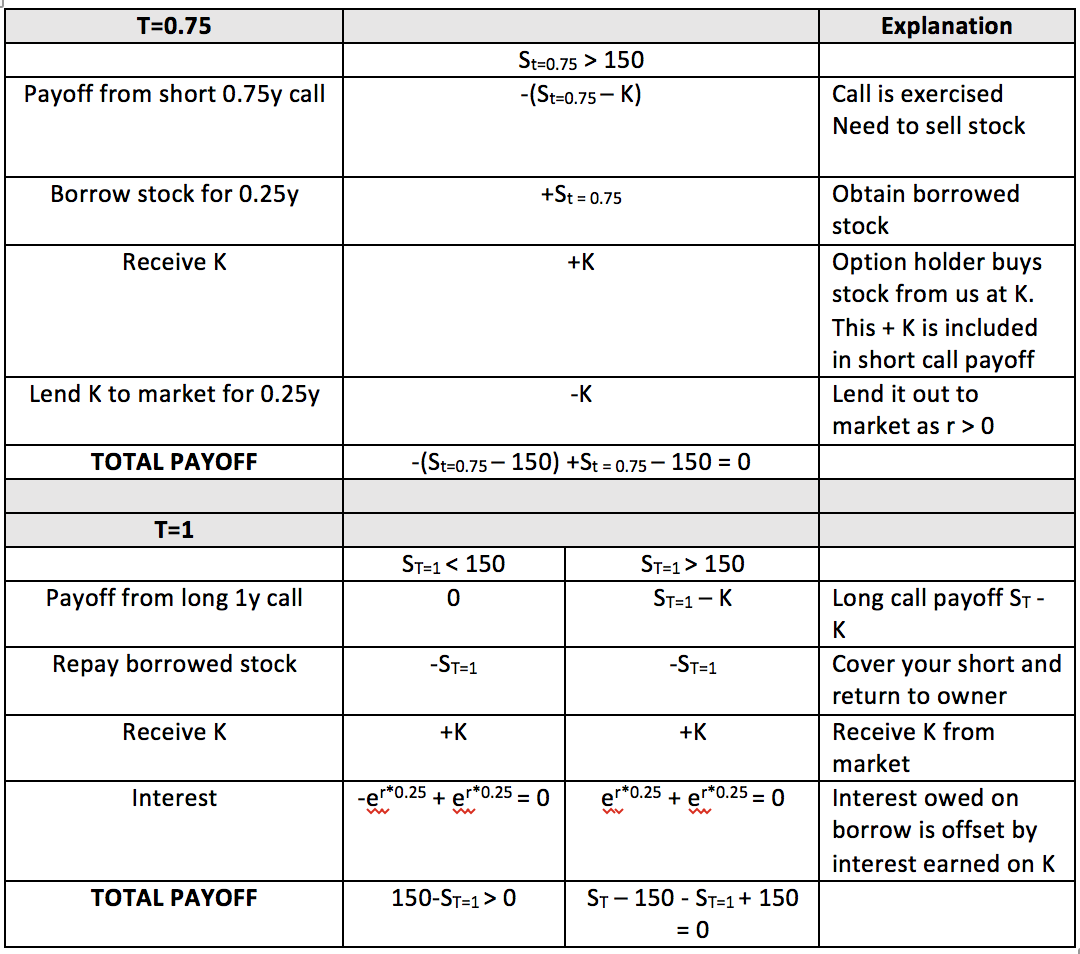



In all scenarios in the future, we have a non-negative payoff. 

So the arbitrage strategy to generate a riskless profit is: 

Sell the 0.75y 150 Call, buy 1y 150 Call and if St=0.75 > 150, then at t=0.75, 

    a) borrow stock for 0.25y 
    b) lend K to market for 0.25y


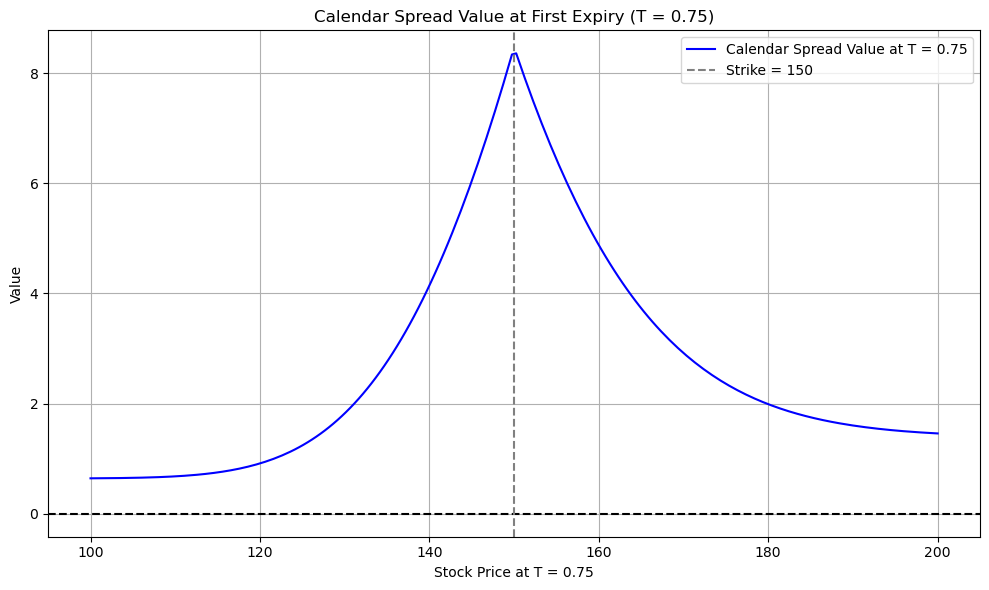

In [210]:
# Plot calendar spread to visualise (note we are using the Black Scholes model)

from scipy.stats import norm

# Black-Scholes formula for European call option
def black_scholes_call(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2) # Call option price

# Parameters (taking a random r > 0 and sigma)
K = 150
r = 0.02
sigma = 0.25
T1 = 0.75
T2 = 1.00
initial_cost = -0.64

# Range of stock prices at the time of first expiry (T = 0.75)
S = np.linspace(100, 200, 200)

# Payoff of expired short call
short_call_payoff = np.maximum(S - K, 0)

# Value of long call (0.25 years remaining)
long_call_value = black_scholes_call(S, K, T2 - T1, r, sigma)

# P&L: Long call value - Short call payoff - Initial cost
calendar_pnl = long_call_value - short_call_payoff - initial_cost

# Plot
plt.figure(figsize=(10, 6))
plt.plot(S, calendar_pnl, label='Calendar Spread Value at T = 0.75', color='blue')
plt.axhline(0, color='black', linestyle='--')
plt.axvline(K, color='gray', linestyle='--', label=f'Strike = {K}')
plt.title('Calendar Spread Value at First Expiry (T = 0.75)')
plt.xlabel('Stock Price at T = 0.75')
plt.ylabel('Value')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()